<a href="https://colab.research.google.com/github/jaiVIT123/ML-Assignment/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#**Loading the Datasets**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Company Datasets.csv', na_values = '?')
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


In [ ]:
df.shape

(20015, 65)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20015 entries, 0 to 20014
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   20014 non-null  float64
 1   Attr2   20014 non-null  float64
 2   Attr3   20014 non-null  float64
 3   Attr4   19955 non-null  float64
 4   Attr5   19970 non-null  float64
 5   Attr6   20014 non-null  float64
 6   Attr7   20014 non-null  float64
 7   Attr8   19982 non-null  float64
 8   Attr9   20012 non-null  float64
 9   Attr10  20014 non-null  float64
 10  Attr11  20014 non-null  float64
 11  Attr12  19955 non-null  float64
 12  Attr13  19952 non-null  float64
 13  Attr14  20014 non-null  float64
 14  Attr15  19999 non-null  float64
 15  Attr16  19982 non-null  float64
 16  Attr17  19982 non-null  float64
 17  Attr18  20014 non-null  float64
 18  Attr19  19952 non-null  float64
 19  Attr20  19952 non-null  float64
 20  Attr21  19058 non-null  float64
 21  Attr22  20014 non-null  float64
 22

#**Data Preprocessing**

In [ ]:
columns_to_be_dropped = [
    col for col in df.columns if df[col].isnull().sum() >= (0.2 * df.shape[0])
]

print(f"Drop the following columns: {columns_to_be_dropped}")

Drop the following columns: ['Attr37']


In [ ]:
df = df.drop(
    columns = columns_to_be_dropped,
    axis = 1
)

df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


In [ ]:
df.shape

(20015, 64)

In [ ]:
print(list(df.isnull().sum()))

[1, 1, 1, 60, 45, 1, 1, 33, 3, 1, 1, 60, 63, 1, 16, 33, 33, 1, 63, 63, 957, 1, 63, 299, 1, 33, 1340, 451, 1, 63, 63, 195, 60, 33, 1, 1, 1, 63, 60, 384, 63, 63, 63, 1192, 60, 157, 1, 63, 33, 1, 160, 451, 451, 0, 63, 1, 44, 1, 1194, 48, 63, 60, 451, 0]


In [ ]:
for col_name, col_data in df.items():
    if df[col_name].isnull().sum() > 0:
        df[col_name] = df[col_name].fillna(df[col_name].mean())

In [ ]:
df.isnull().sum().sum()

0

#**Feature Selection**

In [ ]:
y = df['class']
(y)

,class
0,0
1,0
2,0
3,0
4,0
...,...
20010,1
20011,1
20012,1
20013,1


In [ ]:
x = df.drop(columns = ['class'], axis = 1)
(x)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.174190,0.41299,0.143710,1.34800,-28.9820,0.603830,0.219460,1.12250,1.19610,0.46359,...,127280.00,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.03410
1,0.146240,0.46038,0.282300,1.62940,2.5952,0.000000,0.171850,1.17210,1.60180,0.53962,...,3387.80,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.95000
2,0.000595,0.22612,0.488390,3.15990,84.8740,0.191140,0.004572,2.98810,1.00770,0.67566,...,20453.00,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.45810
3,0.024526,0.43236,0.275460,1.78330,-10.1050,0.569440,0.024526,1.30570,1.05090,0.56453,...,5012.60,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.48440
4,0.188290,0.41504,0.342310,1.92790,-58.2740,0.000000,0.233580,1.40940,1.33930,0.58496,...,13730.00,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.63750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20010,0.004676,0.54949,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,0.43205,...,8772.00,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150
20011,-0.027610,0.60748,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,0.33509,...,-564.42,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810
20012,-0.238290,0.62708,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,0.17760,...,7371.80,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501
20013,0.097188,0.75300,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,0.24700,...,-4346.00,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910


##**Key Features for Decision Forest Classifier**

In [ ]:
rfe_dtc = RFE(
    estimator = DecisionTreeClassifier(),
    n_features_to_select = 10
)

In [ ]:
rfe_dtc.fit(x, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [ ]:
dtc_selected_features = []
for i, col in zip(range(x.shape[1]), x.columns):
    if rfe_dtc.support_[i]:
        dtc_selected_features.append(col)
print(f"Decision Tree Classifier : \n{dtc_selected_features}")

Decision Tree Classifier : 
['Attr5', 'Attr13', 'Attr21', 'Attr24', 'Attr27', 'Attr28', 'Attr34', 'Attr46', 'Attr55', 'Attr58']


##**Key Features for Random Forest Classifier**

In [ ]:
rfe_rfc = RFE(
    estimator = RandomForestClassifier(),
    n_features_to_select = 10
)

In [ ]:
rfe_rfc.fit(x, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [ ]:
rfc_selected_features = []
for i, col in zip(range(x.shape[1]), x.columns):
    if rfe_rfc.support_[i]:
        rfc_selected_features.append(col)
print(f"Random Forest Classifier : \n{rfc_selected_features}")

Random Forest Classifier : 
['Attr5', 'Attr9', 'Attr21', 'Attr27', 'Attr29', 'Attr34', 'Attr35', 'Attr46', 'Attr56', 'Attr58']


##**Key Features for XGBoost**

In [ ]:
rfe_xgb = RFE(
    estimator = XGBClassifier(),
    n_features_to_select = 10
)

In [ ]:
rfe_xgb.fit(x, y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=None,
                            num_parallel_tree=None, random_state=None, ...),
    n_features_to_select=10)

In [ ]:
xgb_selected_features = []
for i, col in zip(range(x.shape[1]), x.columns):
    if rfe_xgb.support_[i]:
        xgb_selected_features.append(col)
print(f"XGB Classifier : \n{xgb_selected_features}")

XGB Classifier : 
['Attr5', 'Attr13', 'Attr21', 'Attr26', 'Attr27', 'Attr34', 'Attr39', 'Attr46', 'Attr56', 'Attr58']


#**Train-Test Split**

In [ ]:
def train_test_splitting(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    return x_train, x_test, y_train, y_test

In [ ]:
dtc_x_train, dtc_x_test, dtc_y_train, dtc_y_test = train_test_splitting(
    x = x.drop(columns = [col for col in x if col not in dtc_selected_features], axis = 1),
    y = y
)

rfc_x_train, rfc_x_test, rfc_y_train, rfc_y_test = train_test_splitting(
    x = x.drop(columns = [col for col in x if col not in rfc_selected_features], axis = 1),
    y = y
)

xgb_x_train, xgb_x_test, xgb_y_train, xgb_y_test = train_test_splitting(
    x = x.drop(columns = [col for col in x if col not in xgb_selected_features], axis = 1),
    y = y
)

In [ ]:
def balance_data(x_train, y_train):
    smote = SMOTE()
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
    return x_train_smote, y_train_smote

In [ ]:
dtc_x_train_smote, dtc_y_train_smote = balance_data(
    x_train = dtc_x_train,
    y_train = dtc_y_train
)

rfc_x_train_smote, rfc_y_train_smote = balance_data(
    x_train = rfc_x_train,
    y_train = rfc_y_train
)

xgb_x_train_smote, xgb_y_train_smote = balance_data(
    x_train = xgb_x_train,
    y_train = xgb_y_train
)

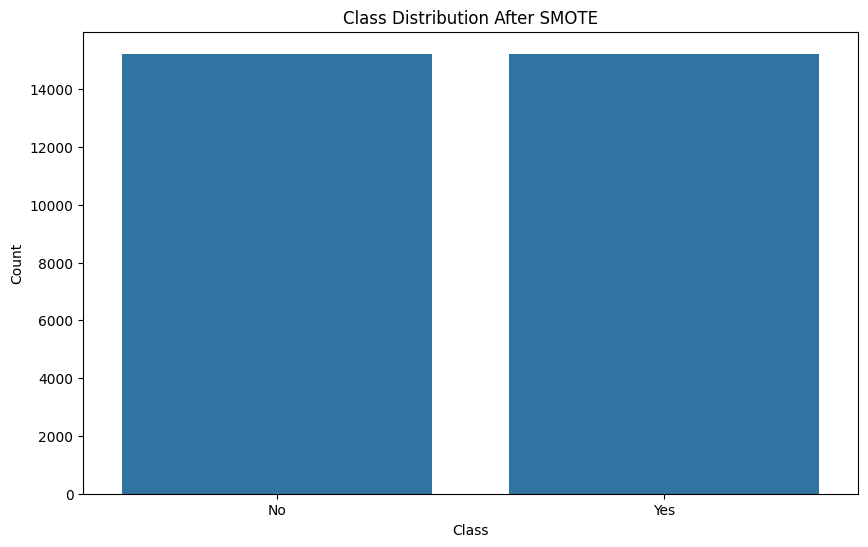

In [ ]:
try:
    dtc_x_train_smote_df = pd.DataFrame(dtc_x_train_smote)
    dtc_x_train_smote_df['class'] = dtc_y_train_smote.map({0: 'No', 1: 'Yes'})
except Exception as e:
    print(f"Error: {e}")

plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=dtc_x_train_smote_df)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#**Classifiers**

##**Decision Tree Classifier**

In [ ]:
dtc_classifier = DecisionTreeClassifier()

dtc_classifier.fit(dtc_x_train_smote, dtc_y_train_smote)

dtc_prediction = dtc_classifier.predict(dtc_x_test)
dtc_train_prediction = dtc_classifier.predict(dtc_x_train)

In [ ]:
pd.crosstab(dtc_y_test, dtc_prediction)

col_0,0,1
class,,
0,3466,339
1,77,121


In [ ]:
print(classification_report(dtc_y_test, dtc_prediction))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3805
           1       0.26      0.61      0.37       198

    accuracy                           0.90      4003
   macro avg       0.62      0.76      0.66      4003
weighted avg       0.94      0.90      0.91      4003



In [ ]:
dtc_test_acc = accuracy_score(dtc_y_test, dtc_prediction)
dtc_train_acc = accuracy_score(dtc_y_train, dtc_train_prediction)

print(f"Test Accuracy = {dtc_test_acc}")
print(f"Train Accuracy = {dtc_train_acc}")

Test Accuracy = 0.8960779415438421
Train Accuracy = 1.0


##**Random Forest Classifier**

In [ ]:
rfc_classifier = RandomForestClassifier(n_estimators = 300)

rfc_classifier.fit(rfc_x_train_smote, rfc_y_train_smote)

rfc_prediction = rfc_classifier.predict(rfc_x_test)
rfc_train_prediction = rfc_classifier.predict(rfc_x_train)

In [ ]:
pd.crosstab(rfc_y_test, rfc_prediction)

col_0,0,1
class,,
0,3633,172
1,77,121


In [ ]:
print(classification_report(rfc_y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3805
           1       0.41      0.61      0.49       198

    accuracy                           0.94      4003
   macro avg       0.70      0.78      0.73      4003
weighted avg       0.95      0.94      0.94      4003



In [ ]:
rfc_test_acc = accuracy_score(rfc_y_test, rfc_prediction)
rfc_train_acc = accuracy_score(rfc_y_train, rfc_train_prediction)

print(f"Test Accuracy = {rfc_test_acc}")
print(f"Train Accuracy = {rfc_train_acc}")

Test Accuracy = 0.9377966525106171
Train Accuracy = 1.0


##**XGBoost Classifier**

In [ ]:
xgb_classifier = XGBClassifier(max_depth = 8)

xgb_classifier.fit(xgb_x_train_smote, xgb_y_train_smote)

xgb_prediction = xgb_classifier.predict(xgb_x_test)
xgb_train_prediction = xgb_classifier.predict(xgb_x_train)

In [ ]:
pd.crosstab(xgb_y_test, xgb_prediction)

col_0,0,1
class,,
0,3669,136
1,61,137


In [ ]:
print(classification_report(xgb_y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3805
           1       0.50      0.69      0.58       198

    accuracy                           0.95      4003
   macro avg       0.74      0.83      0.78      4003
weighted avg       0.96      0.95      0.95      4003



In [ ]:
xgb_test_acc = accuracy_score(xgb_y_test, xgb_prediction)
xgb_train_acc = accuracy_score(xgb_y_train, xgb_train_prediction)

print(f"Test Accuracy = {xgb_test_acc}")
print(f"Train Accuracy = {xgb_train_acc}")

Test Accuracy = 0.9507869098176368
Train Accuracy = 0.9996252810392205


#**Selecting Classifier for Model**

In [ ]:
pd.DataFrame({
    'Model': [
        'Decision Tree',
        'Random Forest',
        'XGBoost'
    ],
    'Test Accuracy': [
        round(dtc_test_acc*100, 2),
        round(rfc_test_acc*100, 2),
        round(xgb_test_acc*100, 2)
    ],
    'Train Accuracy': [
        round(dtc_train_acc*100, 2),
        round(rfc_train_acc*100, 2),
        round(xgb_train_acc*100, 2)
    ],
    'Selected Features': [
        dtc_selected_features,
        rfc_selected_features,
        xgb_selected_features
    ]
})

,Model,Test Accuracy,Train Accuracy,Selected Features
0,Decision Tree,89.61,100.00,"[Attr5, Attr13, Attr21, Attr24, Attr27, Attr28..."
1,Random Forest,93.78,100.00,"[Attr5, Attr9, Attr21, Attr27, Attr29, Attr34,..."
2,XGBoost,95.08,99.96,"[Attr5, Attr13, Attr21, Attr26, Attr27, Attr34..."


#**Model Testing**

In [ ]:
bankrupt = xgb_classifier.predict([[
    38.803,46.705,2.872,0.59628,0.2375,
    0.053954,1.2819,0.22599,0.77401,3.1534
]])[0]

In [ ]:
if bankrupt:
    print("The company is likely to go BANKRUPT.")
else:
    print("The company is SAFE.")

The company is SAFE.
